In [1]:
import matplotlib.pyplot as plt
import torch
import torchvision

In [2]:
import sys
sys.path.append("../src/")

%load_ext autoreload
%autoreload 2
# Importing our custom module(s)
import unet

In [3]:
root = "/cluster/tufts/hugheslab/eharve06/CIFAR-10"
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])
train_dataset = torchvision.datasets.CIFAR10(root=root, train=True, transform=transform, download=True)
image = train_dataset[0][0]
print(image.shape)

Files already downloaded and verified
torch.Size([3, 32, 32])


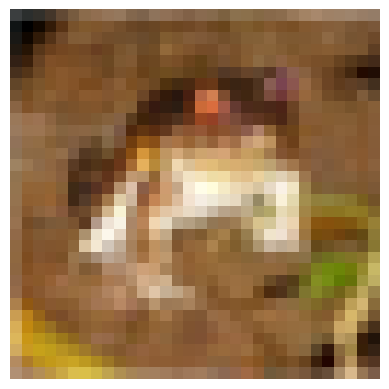

In [4]:
plt.imshow(image.permute(1, 2, 0))
plt.axis("off")
plt.show()

In [5]:
x = image[None,:,:,:]
#x = torch.randn(1, 3, 1, 1)

model = unet.UNet(num_classes=3)

with torch.no_grad():
    logits = model(x)
    print(logits.shape)
    

torch.Size([1, 3, 64, 64])


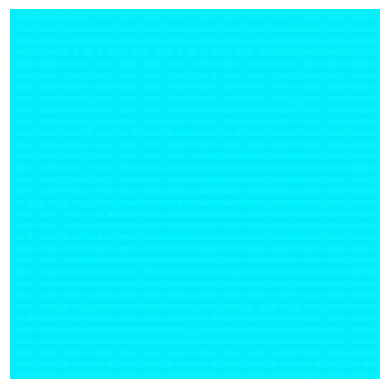

In [6]:
with torch.no_grad():
    norm_logits = (logits - logits.min()) / (logits.max() - logits.min())

plt.imshow(norm_logits.squeeze().permute(1, 2, 0))
plt.axis("off")
plt.show()